In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy

# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\XRD"
#####

folder_name1 = '230221G'
file_name1 = "230221G_XRD data.xlsx"
file_title1 = file_name1.replace(' data.xlsx', '')
df_title1 = '_' + file_title1 + '_df'
globals()[df_title1] = pd.read_excel(os.path.join(folder_path, folder_name1, file_name1), sheet_name='raw data')
#####
folder_name2 = "230310E"
file_name2 = "230310E_XRD data.xlsx"
file_title2 = file_name2.replace(' data.xlsx', '')
df_title2 = '_' + file_title2 + '_df'
globals()[df_title2] = pd.read_excel(os.path.join(folder_path, folder_name2, file_name2), sheet_name='raw data')
#####
# folder_name3 = "231005E"
# file_name3 = "231005Ea_fit.xlsx"
# file_title3 = file_name3.replace('_fit.xlsx', '')
# df_title3 = '_' + file_title3 + '_df'
# globals()[df_title3] = pd.read_excel(os.path.join(folder_path, folder_name3, file_name3), sheet_name='raw data')
#####
# folder_name4 = "231005B"
# file_name4 = "231005B_fit.xlsx"
# file_title4 = file_name4.replace('.xlsx', '')
# df_title4 = '_' + file_title4 + '_df'
# globals()[df_title4] = pd.read_excel(os.path.join(folder_path, folder_name4, file_name4), sheet_name='raw data')

##### Reference patterns
reference_path = 'C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\XRD\\XRD ref patterns.xlsx'
CZTSe_reference_df = pd.read_excel(reference_path, sheet_name='CZTSe')
CZTS_reference_df = pd.read_excel(reference_path, sheet_name='CZTS')
MoSe2_reference_df = pd.read_excel(reference_path, sheet_name='MoSe2')
Mo_reference_df = pd.read_excel(reference_path, sheet_name='Mo')

CZTSe_reference_df = CZTSe_reference_df.rename(columns={CZTSe_reference_df.columns[0]: 'Two Theta', CZTSe_reference_df.columns[1]: 'Intensity'})
CZTS_reference_df = CZTS_reference_df.rename(columns={CZTS_reference_df.columns[0]: 'Two Theta', CZTS_reference_df.columns[1]: 'Intensity'})
MoSe2_reference_df = MoSe2_reference_df.rename(columns={MoSe2_reference_df.columns[0]: 'Two Theta', MoSe2_reference_df.columns[1]: 'Intensity'})
Mo_reference_df = Mo_reference_df.rename(columns={Mo_reference_df.columns[0]: 'Two Theta', Mo_reference_df.columns[1]: 'Intensity'})


## Plotting

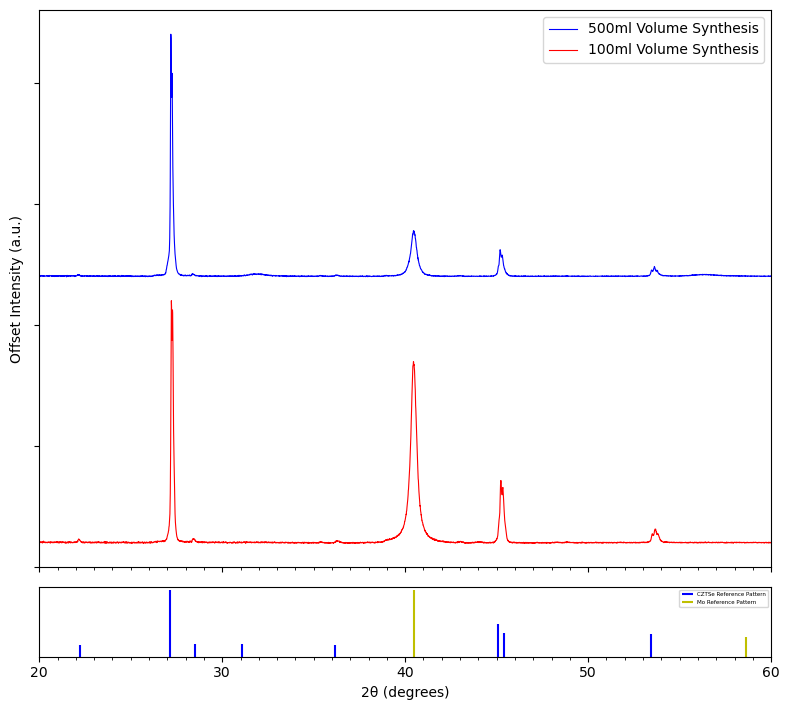

In [25]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8), gridspec_kw={'height_ratios': [8, 1]})

# Plot the sum of curves on the first subplot
ax1.plot(globals()[df_title1]['two_theta'], 120 + globals()[df_title1]['normalised intensity'], linewidth=0.8, c='b', alpha=1, label="500ml Volume Synthesis")
ax1.plot(globals()[df_title2]['two_theta'], 10+ globals()[df_title2]['normalised intensity'], c='r', linewidth=0.8, alpha=1, label="100ml Volume Synthesis")
# ax1.plot(globals()[df_title3]['two_theta'], globals()[df_title3]['base_sub_intensity'], c='g', linewidth=0.5, alpha=1, label=file_title3)
# ax1.plot(globals()[df_title4]['two_theta'], globals()[df_title4]['base_sub_intensity'], c='b', linewidth=0.5, alpha=1, label=file_title4)
ax1.set_ylabel("Offset Intensity (a.u.)")
ax1.set_yticklabels([]) 
ax1.set_xlim(20,60)
ax1.set_ylim(0,230)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.legend()

# Plot the XRD reference pattern on the second subplot
ax2.vlines(CZTSe_reference_df['Two Theta'], -20, CZTSe_reference_df['Intensity'], colors='b', label='CZTSe Reference Pattern')
# ax2.vlines(CZTS_reference_df['Two Theta'], -20, CZTS_reference_df['Intensity'], colors='r', label='CZTS Reference Pattern')
ax2.vlines(Mo_reference_df['Two Theta'], -20, Mo_reference_df['Intensity'], colors='y', label='Mo Reference Pattern')
# ax2.vlines(MoSe2_reference_df['Two Theta'], -20, MoSe2_reference_df['Intensity'], colors='r', label='MoSe2 Reference Pattern')
ax2.set_xlabel("2θ (degrees)")
ax2.set_yticks([])
ax2.set_ylim(-20,105)
ax2.legend(loc='upper right', fontsize='4')

# Adjust spacing between subplots and set the height of the reference subplot
plt.subplots_adjust(hspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Save the plot as an image file
file_title = file_title1 + ' ' + file_title2 + ' ' + 'raw_data_sq'
plt.savefig(os.path.join(folder_path, 'Stacked plots', file_title + '.png'), dpi=500)


## Broken Axis Plot

<IPython.core.display.Javascript object>


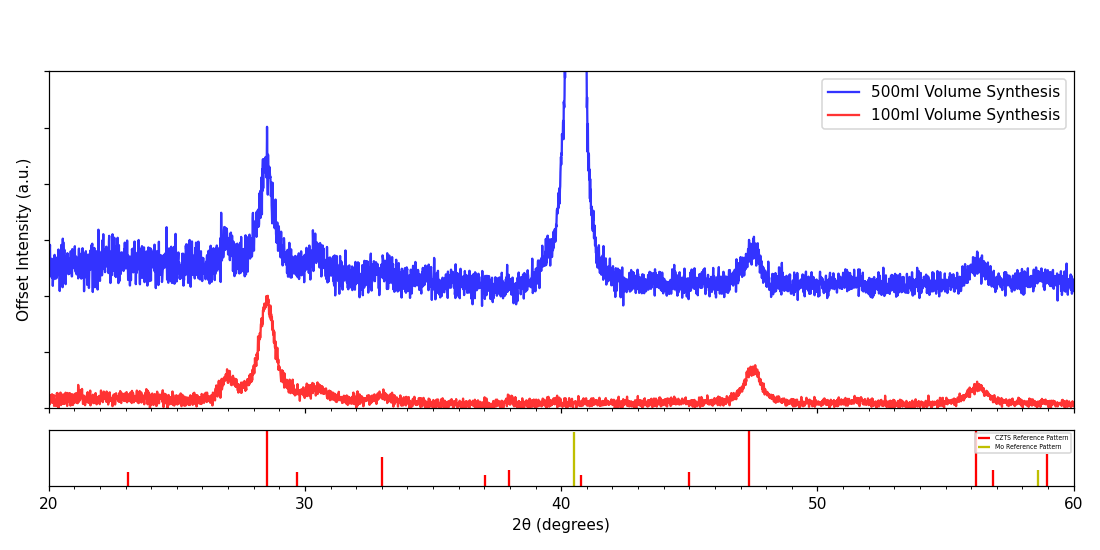

In [49]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5), gridspec_kw={'height_ratios': [6, 1]})

# Plot the sum of curves on the first subplot
ax1.plot(globals()[df_title1]['two_theta'], 100 + globals()[df_title1]['normalised intensity']*12, c='b', alpha=0.8, label="500ml Volume Synthesis" )
ax1.plot(globals()[df_title2]['two_theta'], globals()[df_title2]['normalised intensity'], c='r', alpha=0.8, label="100ml Volume Synthesis")
# ax1.plot(globals()[df_title3]['two_theta'], globals()[df_title3]['base_sub_intensity'], c='g', alpha=0.8, label=file_title3)
# ax1.plot(globals()[df_title4]['two_theta'], globals()[df_title4]['base_sub_intensity'], c='b', alpha=0.8, label=file_title4)
ax1.set_ylabel("Offset Intensity (a.u.)")
ax1.set_yticklabels([]) 
ax1.set_xlim(20,60)
ax1.set_ylim(0,300)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.legend()

# Plot the XRD reference pattern on the second subplot
# ax2.vlines(CZTSe_reference_df['Two Theta'], -20, CZTSe_reference_df['Intensity'], colors='b', label='CZTSe Reference Pattern')
ax2.vlines(CZTS_reference_df['Two Theta'], -20, CZTS_reference_df['Intensity'], colors='r', label='CZTS Reference Pattern')
ax2.vlines(Mo_reference_df['Two Theta'], -20, Mo_reference_df['Intensity'], colors='y', label='Mo Reference Pattern')
# ax2.vlines(MoSe2_reference_df['Two Theta'], -20, MoSe2_reference_df['Intensity'], colors='r', label='MoSe2 Reference Pattern')
ax2.set_xlabel("2θ (degrees)")
ax2.set_yticks([])
ax2.set_ylim(-20,105)
ax2.legend(loc='upper right', fontsize='4')

# Adjust spacing between subplots and set the height of the reference subplot
plt.subplots_adjust(hspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Save the plot as an image file
file_title = file_title1 + ' ' + file_title2 + ' ' + 'raw_data'
plt.savefig(os.path.join(folder_path, 'Stacked plots', file_title + '.png'), dpi=500)


## Normalised Intensity

<IPython.core.display.Javascript object>


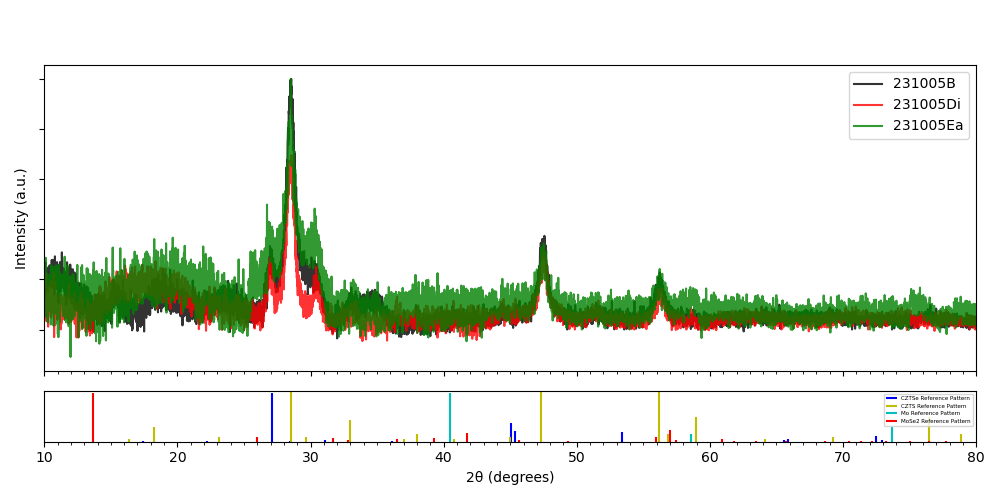

In [63]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5), gridspec_kw={'height_ratios': [6, 1]})

# Plot the sum of curves on the first subplot
ax1.plot(globals()[df_title1]['two_theta'], globals()[df_title1]['normalised_intensity'], c='k', alpha=0.8, label=file_title1)
ax1.plot(globals()[df_title2]['two_theta'], globals()[df_title2]['normalised_intensity'], c='r', alpha=0.8, label=file_title2)
ax1.plot(globals()[df_title3]['two_theta'], globals()[df_title3]['normalised_intensity'], c='g', alpha=0.8, label=file_title3)
# ax1.plot(globals()[df_title4]['two_theta'], globals()[df_title4]['normalised_intensity'], c='b', alpha=0.8, label=file_title4)
ax1.set_ylabel("Intensity (a.u.)")
ax1.set_yticklabels([]) 
ax1.set_xlim(10,80)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.legend()

# Plot the XRD reference pattern on the second subplot
ax2.vlines(CZTSe_reference_df['Two Theta'], 0, CZTSe_reference_df['Intensity'], colors='b', label='CZTSe Reference Pattern')
ax2.vlines(CZTS_reference_df['Two Theta'], 0, CZTS_reference_df['Intensity'], colors='y', label='CZTS Reference Pattern')
ax2.vlines(Mo_reference_df['Two Theta'], 0, Mo_reference_df['Intensity'], colors='c', label='Mo Reference Pattern')
ax2.vlines(MoSe2_reference_df['Two Theta'], 0, MoSe2_reference_df['Intensity'], colors='r', label='MoSe2 Reference Pattern')
ax2.set_xlabel("2θ (degrees)")
ax2.set_yticks([])
ax2.set_ylim(0,105)
ax2.legend(loc='upper right', fontsize='4')

# Adjust spacing between subplots and set the height of the reference subplot
plt.subplots_adjust(hspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Save the plot as an image file
file_title = file_title1 + ' ' + file_title2 + ' ' + file_title3 + ' ' + 'overlap plot'
plt.savefig(os.path.join(folder_path, 'Stacked plots', file_title + '.png'), dpi=500)


## Offset Intensity Plot

<IPython.core.display.Javascript object>


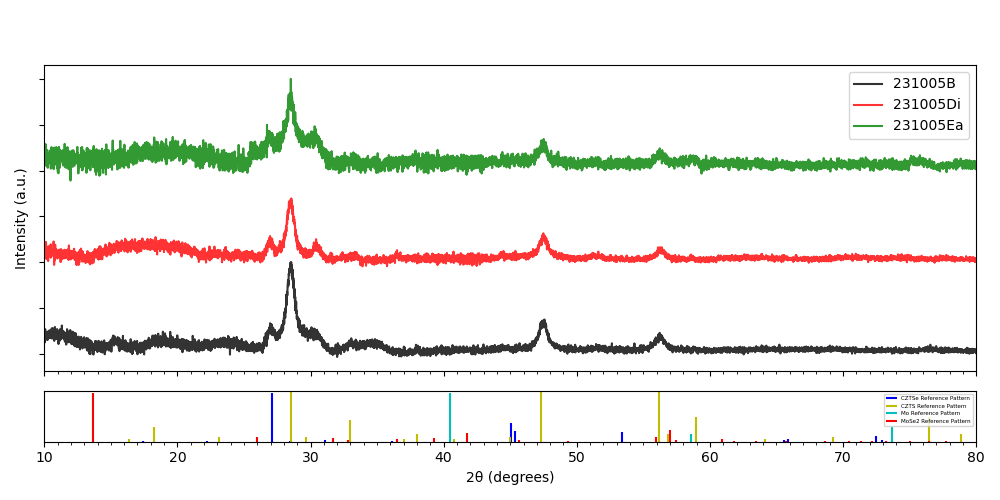

In [64]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5), gridspec_kw={'height_ratios': [6, 1]})

# Plot the sum of curves on the first subplot
ax1.plot(globals()[df_title1]['two_theta'], globals()[df_title1]['normalised_intensity'], c='k', alpha=0.8, label=file_title1)
ax1.plot(globals()[df_title2]['two_theta'], globals()[df_title2]['normalised_intensity']+100 , c='r', alpha=0.8, label=file_title2)
ax1.plot(globals()[df_title3]['two_theta'], globals()[df_title3]['normalised_intensity']+200, c='g', alpha=0.8, label=file_title3)
# ax1.plot(globals()[df_title4]['two_theta'], globals()[df_title4]['normalised_intensity'], c='b', alpha=0.8, label=file_title4)
ax1.set_ylabel("Intensity (a.u.)")
ax1.set_yticklabels([]) 
ax1.set_xlim(10,80)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.legend()

# Plot the XRD reference pattern on the second subplot
ax2.vlines(CZTSe_reference_df['Two Theta'], 0, CZTSe_reference_df['Intensity'], colors='b', label='CZTSe Reference Pattern')
ax2.vlines(CZTS_reference_df['Two Theta'], 0, CZTS_reference_df['Intensity'], colors='y', label='CZTS Reference Pattern')
ax2.vlines(Mo_reference_df['Two Theta'], 0, Mo_reference_df['Intensity'], colors='c', label='Mo Reference Pattern')
ax2.vlines(MoSe2_reference_df['Two Theta'], 0, MoSe2_reference_df['Intensity'], colors='r', label='MoSe2 Reference Pattern')
ax2.set_xlabel("2θ (degrees)")
ax2.set_yticks([])
ax2.set_ylim(0,105)
ax2.legend(loc='upper right', fontsize='4')

# Adjust spacing between subplots and set the height of the reference subplot
plt.subplots_adjust(hspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Save the plot as an image file
file_title = file_title1 + ' ' + file_title2 + ' ' + file_title3 + ' ' + 'stackplot'
plt.savefig(os.path.join(folder_path, 'Stacked plots', file_title + '.png'), dpi=500)
